# My focus is on developing a polynomial regression model for projecting healthcare costs. "https://www.kaggle.com/datasets/mirichoi0218/insurance"

Columns

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance


In [40]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
path = ""

df = pd.read_csv(path+"insurance.csv")

In [42]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
df_smoke_dummies = pd.get_dummies(df["smoker"],dtype=int)
df_smoke_dummies.head(2)

,no,yes
0,0,1
1,1,0


In [44]:
df_test = pd.concat([df_smoke_dummies, df],axis=1)

In [45]:
df_test.drop("smoker",axis=1,inplace=True)

In [46]:
df_test = df_test.select_dtypes([int,float])

In [47]:
df_test.corr()

,no,yes,age,bmi,children,charges
no,1.000000,-1.000000,0.025019,-0.003750,-0.007673,-0.787251
yes,-1.000000,1.000000,-0.025019,0.003750,0.007673,0.787251
age,0.025019,-0.025019,1.000000,0.109272,0.042469,0.299008
bmi,-0.003750,0.003750,0.109272,1.000000,0.012759,0.198341
children,-0.007673,0.007673,0.042469,0.012759,1.000000,0.067998
charges,-0.787251,0.787251,0.299008,0.198341,0.067998,1.000000


Here I can see that a person who smokes has the highest correlation with charges.

And I'm going to use this information in my model

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [49]:
X = df_test.drop("charges",axis=1)
y = df[["charges"]]

* evaluate the best degree for the function 

In [50]:
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,11):
    
    poly_f = PolynomialFeatures(degree=d,include_bias=False )
    X_poly = poly_f.fit_transform(X)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size= 0.3, random_state = 0)
    
    
    
    X_test, X_test_final , y_test, y_test_final = train_test_split(X_test, y_test, test_size= 0.5, random_state = 0)
    
    
    
    model = LinearRegression(fit_intercept=True)
    
    
    
    model.fit(X_train ,y_train )
    
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    

    train_RMSE = np.sqrt(mean_squared_error(y_train["charges"],train_predict))
    test_RMSE = np.sqrt(mean_squared_error(y_test["charges"],test_predict))
    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
 
    
    


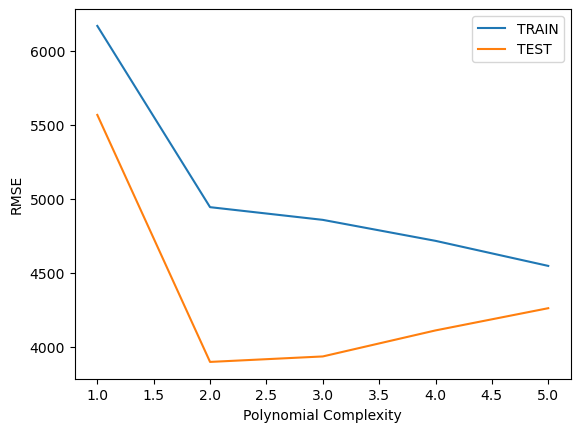

In [61]:
plt.plot(range(1,6),train_rmse_errors[:5] , label="TRAIN")
plt.plot(range(1,6),test_rmse_errors[:5] , label="TEST")
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [62]:
poly_f = PolynomialFeatures(degree=2,include_bias=False )
X_poly = poly_f.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size= 0.3, random_state = 0)



X_test, X_test_final , y_test, y_test_final = train_test_split(X_test, y_test, test_size= 0.5, random_state = 0)



model = LinearRegression(fit_intercept=True)



model.fit(X_train ,y_train )

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

test_final_predict = model.predict(X_test_final)





In [63]:
test_final_RMSE = np.sqrt(mean_squared_error(y_test_final["charges"],test_final_predict))
    

In [65]:
print("final prediction RMSE {}".format(test_final_RMSE))

final prediction RMSE 4966.981368640429
